<a href="https://colab.research.google.com/github/almastupac/ml-automatic-classification-of-products-by-category/blob/main/notebook/classification_of_products_by_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📥 Loading and inspecting the dataset
Before diving into analysis, we first need to load and take a look at its structure.
In this step, we will:
- Load the csv file from GitHub
- Check how many rows and columns we have
- Display the first fex rows
- Review data types and basic metadata for each column

This will help us ensure the dataser is correctly loaded and ready for further exploration.

In [22]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/almastupac/ml-automatic-classification-of-products-by-category/main/data/products.csv"
df = pd.read_csv(url)

# Print shape(number of rows and columns)
print("Dataset shape (rows, columns): ", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())
# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns):  (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


## 🧹 Cleaning Column Names
Before further processing, we clean and standaridze the column names by:
- converting to lowercase
- replacing spaces with underscores
- removing special characters
- making names consistent

In [23]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()  # remove leading/trailing spaces
    .str.lower()  # lowercase
    .str.lstrip("_")  # remove leading underscore
    .str.replace(" ", "_")  # replace spaces
    .str.replace("-", "_")  # replace hyphens
    .str.replace(r"[^a-zA-Z0-9_]", "", regex=True)  # remove special characters
)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       35311 non-null  int64  
 1   product_title    35139 non-null  object 
 2   merchant_id      35311 non-null  int64  
 3   category_label   35267 non-null  object 
 4   product_code     35216 non-null  object 
 5   number_of_views  35297 non-null  float64
 6   merchant_rating  35141 non-null  float64
 7   listing_date     35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


## 🔎 Checking for missing values
Missing data can cause problems during model training or analysis. Here, we will:
- Count the number of missing (NaN) values per column
- Visualize missing values using a heatmap

This will help us identify any colmuns that require cleaning or imputation.

In [24]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product_id           0
product_title      172
merchant_id          0
category_label      44
product_code        95
number_of_views     14
merchant_rating    170
listing_date        59
dtype: int64


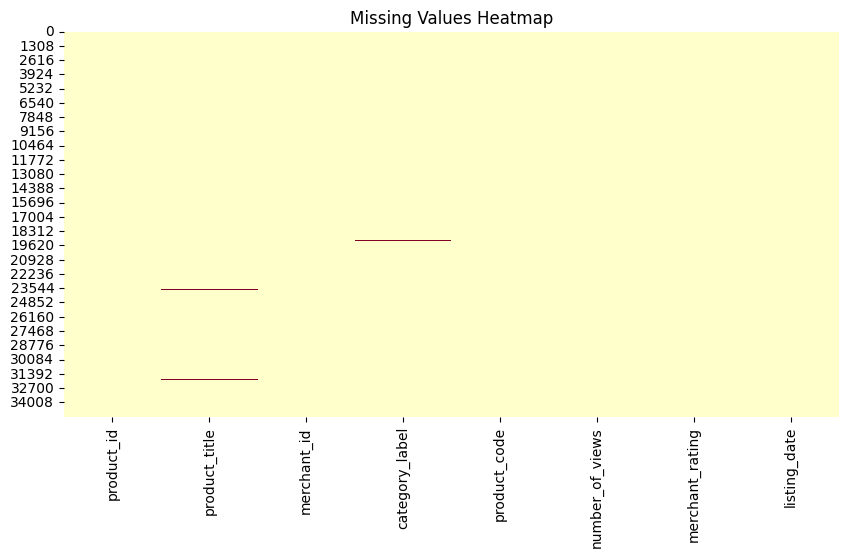

In [25]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

## 📊 Category Label Analysis
We analyze the distribution of product categories in the dataset to understand how many samples belong to each category.
This helps us:
- assess the balance between different classes
- identify potenital class imbalance or skewness in the dataset


In [26]:
# Count occurrences of each sentiment label
category_counts = df['category_label'].value_counts()

# Print counts
print("Category distribution (counts):")
print(category_counts)

Category distribution (counts):
category_label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64


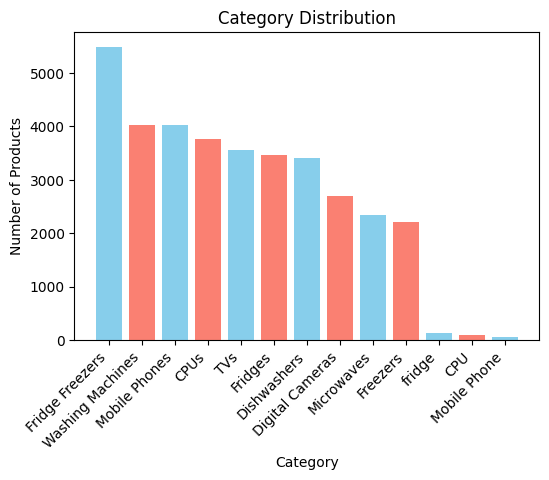

In [27]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(category_counts.index, category_counts.values, color=['skyblue', 'salmon'])
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')
plt.show()

## 🗺 Exploring the 'product_title' Column
In this section, we explore the product titles in order to:
- examine the data type of the 'product title' column
- identify ferquently occuring product titles
- observe common keywords that may indicate specific product categories

This exploratory analysis helps determine whether product titles contatin sufficient and meaningful textual information to be used as input for text-based classification model.

In [28]:
# 1. Check the data type of the 'product_price' column
print("Data type of product_price column:", df['product_title'].dtype)

# 2. Display the first 10 values from the column
print("\nFirst 10 values of product_title column:", df['product_title'].head(10))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_title column:")
print(df['product_title'].value_counts().head(20))

# 4. Convert 'product_title' column to string and lowercase
df['product_title'] = df['product_title'].astype(str).str.lower()

# 5. Remove multiple spaces
import re
df['product_title'] = df['product_title'].str.replace(r"\s+", " ", regex=True).str.strip()

# 6. Standardize number formats and memory labels
# Example: unify formats like "16 gb", "16gb", "16/gb" into "16gb"
df['product_title'] = df['product_title'].str.replace(r"(\d+)\s*gb", r"\1gb", regex=True)

# 7. Removing special characters that are not informative
df['product_title'] = df['product_title'].str.replace(r"[^a-z0-9 ]", " ", regex=True)

# 8. Remove duplicate entries after all cleaning steps
df = df.drop_duplicates(subset=['product_title'])
# Display cleaned product titles
print("Cleaned product titles:")
display(df['product_title'].head(20))

Data type of product_price column: object

First 10 values of product_title column: 0                      apple iphone 8 plus 64gb silver
1                  apple iphone 8 plus 64 gb spacegrau
2    apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...
3                  apple iphone 8 plus 64gb space grey
4    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
5    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
6                 apple iphone 8 plus 64 gb space grey
7                  apple iphone 8 plus 64gb space grey
8                  apple iphone 8 plus 64gb space grey
9                  apple iphone 8 plus 64gb space grey
Name: product_title, dtype: object

Top 20 most frequent values in product_title column:
product_title
washing machine                                                           90
built in fully integrated dishwasher                                      35
frost free fridge freezer                                                 34
washer dryer                    

,product_title
0,apple iphone 8 plus 64gb silver
1,apple iphone 8 plus 64gb spacegrau
2,apple mq8n2b a iphone 8 plus 64gb 5 5 12mp sim...
3,apple iphone 8 plus 64gb space grey
4,apple iphone 8 plus gold 5 5 64gb 4g unlocked ...
10,apple iphone 8 plus 5 5 single sim 4g 64gb silver
11,sim free iphone 8 plus 64gb by apple space grey
12,apple iphone 8 plus 64gb gold smartphone
13,apple iphone 8 plus 5 5 single sim 4g 64gb grey
14,apple iphone 8 plus silver 5 5 64gb 4g unlocke...


## 🧹 Removing missing values
We already analyzed missing data in the previous step. Now we will simply drop all rows that contain missing values, and check the new shape and count missing values per column.

In [29]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (30497, 8)
Missing values per column:
product_id         0
product_title      0
merchant_id        0
category_label     0
product_code       0
number_of_views    0
merchant_rating    0
listing_date       0
dtype: int64


## 🗂 Parsing and Standardize the category_label Column
The category_label column contains catgory names that refer to the same product type but written in different variations.
Examples include:
- "**frigde**, "**fridges**", "**fridge freezer** -> all respresents the same category: "**fridge freezers**",
- similar inconsistencies appear in other categories such as mobile phones, TVs, CPUs, and microwaves.

To ensure clean and consistent data for analysis and model traning, it is essenital to:
- convert all category names to lowercase
- strip extra spaces
- standardize catgory variations
- apply the mapping and review results

In [30]:
# Standardization dictionary for category_label
category_map = {
    # Mobile phones
    'mobile phone': 'mobile phones',
    'mobile phones': 'mobile phones',
    'phone': 'mobile phones',
    'phones': 'mobile phones',
    'smartphones': 'mobile phones',

    # Fridges / freezers
    'fridge freezer': 'fridge freezers',
    'fridges': 'fridge freezers',
    'freezer': 'fridge freezers',
    'freezers': 'fridge freezers',
    'fridges': 'fridge freezers',
    'fridge': 'fridge freezers',

    # Washing machines
    'washing machine': 'washing machines',
    'washing machines': 'washing machines',

    # CPUs
    'cpu': 'cpus',
    'cpus': 'cpus',

    # TVs
    'tv': 'tvs',
    'tvs': 'tvs',

    # Cameras
    'digital camera': 'digital cameras',
    'digital cameras': 'digital cameras',

    # Microwaves
    'microwave': 'microwaves',
    'microwaves': 'microwaves'

}

# Convert to lowercase first
df['category_label'] = df['category_label'].astype(str).str.lower().str.strip()

# Apply mapping
df['category_label'] = df['category_label'].replace(category_map)

# Display new values of column category_label
df['category_label'].value_counts()

,count
category_label,
fridge freezers,9804
mobile phones,3616
washing machines,3360
tvs,3238
dishwashers,3013
cpus,3011
digital cameras,2380
microwaves,2075


##  ✂️ Removing irrelevant columns
Several columns in the dataset do not help with predicting to the product category. They contain IDs or metadata that have no relation to the text of the product title.
Removed columns:
- product_id
- merchant_id,
- product_code,
- number_of_views,
- merchant_rating,
- listing_date

**Remaining columns for modeling:**
- product_title - main text feature
- category_label - target variable

Keeping only useful columns makes the model simpler and reduces noise.


In [32]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['product_id', 'merchant_id', 'product_code', 'number_of_views', 'merchant_rating', 'listing_date'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['product_title', 'category_label']


## 📚 Extracting Category-Specific Keywords
To improve the model, we generate additional features by identifying words that are strongly associated with each product category. For every category, we count how often each word appears within that category and compare it with how often it appears in all other categories.

A word is considered category-specific if:
- it appears ferquently in the target category,
- it appears rarely in other categories,
- it consists only of alphabetic characters,
- it has a length greather than 2.

We then keep the top keywords for each category and later use them to create binary feature columns.

In [34]:
# Step 1: Get all unique catgory names
categories = df['category_label'].unique().tolist()
categories

# Step 2: Compute category-specific keywords
category_specific_words = {}

# Minimum ferquency inside the category
min_cat_count = 20

# Maximum allowes ratio of occurrences in other categories
max_other_ratio = 0.2

for cat in categories:
  # Titles within the current category
  titles_cat = df[df['category_label'] == cat]['product_title']
  words_cat = titles_cat.str.split().explode().value_counts()

  # Titles from all other categories
  titles_other = df[df['category_label'] != cat]['product_title']
  words_other = titles_other.str.split().explode().value_counts()

  specific = []

  # Loop through all words in the category
  for word, cnt in words_cat.items():
    other_cnt = words_other.get(word, 0)
    ratio = other_cnt / (cnt + 1)

    # Filter: ferquent in category, rare in others, alphabetic, length > 2
    if (
        cnt >= min_cat_count and
        ratio < max_other_ratio and
        word.isalpha()  and
        len(word) > 2
    ):specific.append(word)

  # Keep top 30 strongest keywords for this category
  category_specific_words[cat] = specific[:30]

# Preview extracted keywords
category_specific_words

{'mobile phones': ['sim',
  'phone',
  'mobile',
  'smartphone',
  'unlocked',
  'nokia',
  'iphone',
  'galaxy',
  'apple',
  'xperia',
  'ram',
  'doro',
  'huawei',
  'lte',
  'htc',
  'motorola',
  'stock',
  'xiaomi',
  'blackberry',
  'gsm',
  'cameras',
  'rom',
  'alcatel',
  'lite',
  'moto',
  'honor',
  'space',
  'back',
  'ericsson',
  'note'],
 'tvs': ['smart',
  'led',
  'hdr',
  'ultra',
  'freeview',
  'uhd',
  'oled',
  'ready',
  'bravia',
  'philips',
  'qled',
  'play',
  'certified',
  'model',
  'curved',
  'cello',
  'television',
  'dvb',
  'dvd',
  'hospitality',
  'toshiba',
  'freeviewhd',
  'crystal',
  'loewe',
  'hotel',
  'freesat',
  'youview',
  'dolby',
  'linsar',
  'player'],
 'cpus': ['intel',
  'core',
  'processor',
  'ghz',
  'cache',
  'xeon',
  'socket',
  'amd',
  'threads',
  'oem',
  'cpu',
  'retail',
  'packard',
  'enterprise',
  'hewlett',
  'cores',
  'opteron',
  'boxed',
  'pentium',
  'fan',
  'ryzen',
  'heatsink',
  'speicher',
  

## 🧮 Creating New Features
Using the category-specific keywords extracted earlier, we create additional binary features that indicate whether a product title contains any of the important words for a given category.
These features help the model detect strong category signals that might not be fully captured by TF-IDF alone.

For each category, we generate a new column(e.g., has_mobile_phones_word, has_cpus_word, etc.) and assign:
- 1 if the product title contains at least one of that category's keywords
- 0 otherwise


In [37]:
# Creating binary feature columns based on category-specific keywords

for cat, words in category_specific_words.items():
  # Create a column name such as "has_mobile_phones_word"
  col_name = f"has_{cat.replace(' ', '_')}_word"

  # Assign 1 if any keyword for this category appears in the product title
  df[col_name] = df['product_title'].apply(lambda text: int(any(word in text.split() for word in words)))

# Preview updated dataframe
df.head()

,product_title,category_label,has_mobile_phones_word,has_tvs_word,has_cpus_word,has_digital_cameras_word,has_microwaves_word,has_dishwashers_word,has_washing_machines_word,has_fridge_freezers_word
0,apple iphone 8 plus 64gb silver,mobile phones,1,0,0,0,0,0,0,0
1,apple iphone 8 plus 64gb spacegrau,mobile phones,1,0,0,0,0,0,0,0
2,apple mq8n2b a iphone 8 plus 64gb 5 5 12mp sim...,mobile phones,1,0,0,0,0,0,0,0
3,apple iphone 8 plus 64gb space grey,mobile phones,1,0,0,0,0,0,0,0
4,apple iphone 8 plus gold 5 5 64gb 4g unlocked ...,mobile phones,1,0,0,0,0,0,0,0


## ✔️ Traning and Comparing Multiple Machine Learning Models
In this step, we will train and evaluate a machine learning model for product category classification.
Our goal is to build a model that can accurately precit the correct category based on the product title.

We will floow these steps:
-  **Split the dataset into training and test sets** to evaluate the model on unseen data,
- **Transform the product titles using TF-IDF**, converting the text into numerical features;
- **Combine TF-IDF features with the engineered binary features** (created from category-specific keywords)
- **Train a classification algorithm** that learns pattern in the text and additional features;
- **Evaluate the model using accuracy and classification reports** to assess performance across all categories

By the end of this step, we will be able to compare the strenghts and weakness of different algorithms and select the most suitable one for your project.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Features and labels
# All binary feature columns from feature engineering
binary_features = [col for col in df.columns if col.startswith("has_")]

# Combine text + binary columns into X
X = df[['product_title'] + binary_features]

# Target label
y = df['category_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Preprocessor: TF-IDF for text, MinMaxScaler for numeric feature
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), 'product_title'),
        ("binary_features", "passthrough", binary_features)
        ]
)

# List of classifier
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n🔍 {name}")
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))


🔍 Logistic Regression
                  precision    recall  f1-score   support

            cpus       1.00      0.99      1.00       602
 digital cameras       1.00      0.98      0.99       476
     dishwashers       0.96      0.89      0.92       603
 fridge freezers       0.93      0.99      0.96      1961
      microwaves       0.99      0.95      0.97       415
   mobile phones       1.00      0.98      0.99       723
             tvs       0.98      0.98      0.98       648
washing machines       0.98      0.92      0.95       672

        accuracy                           0.97      6100
       macro avg       0.98      0.96      0.97      6100
    weighted avg       0.97      0.97      0.97      6100


🔍 Naive Bayes
                  precision    recall  f1-score   support

            cpus       1.00      1.00      1.00       602
 digital cameras       1.00      0.99      0.99       476
     dishwashers       1.00      0.91      0.95       603
 fridge freezers       0.95   